In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
passengers = pd.read_csv('passengers.csv', index_col='date', parse_dates=True)

In [3]:
def get_mse_additive(series, alpha, beta, gamma):
    m=12
    l=[]
    l.append(series[m-1])
    
    b=[]
    b.append(np.mean(series[m:2*m])-np.mean(series[0:m]))
    
    s=[]
    for i in range(m):
        s.append(series[i]-np.mean(series[0:m]))
        
    y_aprx=[]
    y_aprx.append(series[m-1])
    
    for i in range(m, len(series)):
        prev_season=s[i-m]
        last_season=s[i-m+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(series[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(series[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    mse=[]
    for i in range(len(y_aprx)-12):
        mse.append((series[i+12]-y_aprx[i])**2)
    
    return sum(mse)/(2*len(mse))

In [4]:
get_mse_additive(passengers['num_passengers'].values, 0.4, 0.03, 0.75)

122.65018278998866

In [5]:
def get_optimal_params(series):
    return minimize(lambda x: get_mse_additive(series, x[0], x[1], x[2]), (0.4, 0.03, 0.75), bounds=[(0, 1), (0, 1), (0, 1)])

In [8]:
get_optimal_params(passengers['num_passengers'].values)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 96.34906158288062
        x: [ 4.406e-01  8.333e-02  8.786e-01]
      nit: 11
      jac: [ 1.180e-04 -9.592e-04 -1.975e-04]
     nfev: 60
     njev: 15
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [9]:
def approximation_HOLTWINTERS_additive():
    alpha=4.406e-01
    beta=8.333e-02
    gamma=8.786e-01
    
    
    l=[]
    l.append(passengers['num_passengers'].values[11])
    
    b=[]
    b.append(np.mean(passengers['num_passengers'].values[12:24])-np.mean(passengers['num_passengers'].values[0:12]))
    
    s=[]
    for i in range(12):
        s.append(passengers['num_passengers'].values[i]-np.mean(passengers['num_passengers'].values[0:12]))
        
    y_aprx=[]
    y_aprx.append(passengers['num_passengers'].values[11])
    
    for i in range(12, len(passengers.index)):
        prev_season=s[i-12]
        last_season=s[i-12+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(passengers['num_passengers'].values[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(passengers['num_passengers'].values[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    plt.plot(y_aprx)
    plt.plot(passengers['num_passengers'][12:].values)

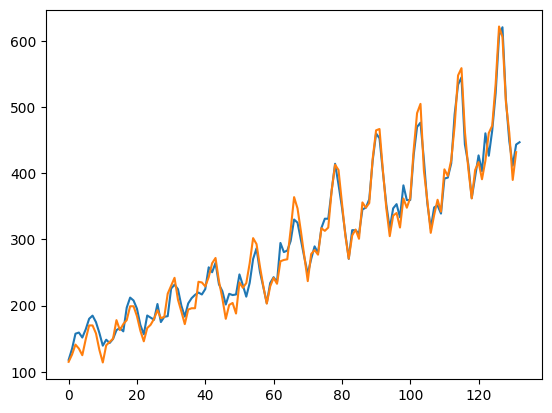

In [10]:
approximation_HOLTWINTERS_additive()

In [11]:
def forecast_HOLTWINTERS_additive():
    alpha=3.649e-01
    beta=1.452e-01
    gamma=7.033e-01
    
    l=[]
    l.append(passengers['num_passengers'].values[11])
    
    b=[]
    b.append(np.mean(passengers['num_passengers'].values[12:24])-np.mean(passengers['num_passengers'].values[0:12]))
    
    s=[]
    for i in range(12):
        s.append(passengers['num_passengers'].values[i]-np.mean(passengers['num_passengers'].values[0:12]))
        
    y_aprx=[]
    y_aprx.append(passengers['num_passengers'].values[11])
    
    for i in range(12, len(passengers.index)):
        prev_season=s[i-12]
        last_season=s[i-12+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(passengers['num_passengers'].values[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(passengers['num_passengers'].values[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
        
    for i in range(36):
        prev_season=s[-12]
        last_season=s[-11]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(y_aprx[-1]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(y_aprx[-1]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    plt.plot(y_aprx)
    plt.plot(passengers['num_passengers'][12:].values)

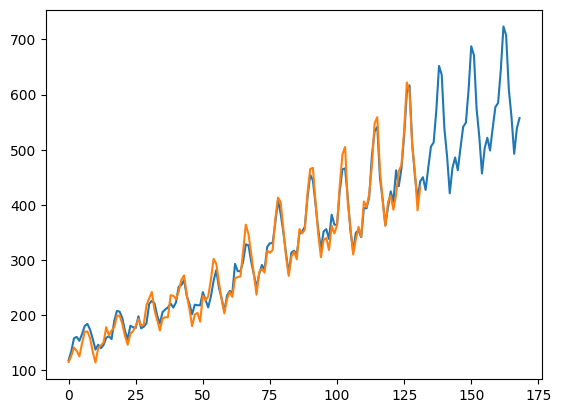

In [12]:
forecast_HOLTWINTERS_additive()

In [15]:
def get_mse_additive_2(series, start_level, start_trend):
    alpha=0.4
    beta=0.03
    gamma=0.75
    m=12
    l=[]
    l.append(start_level)
    
    b=[]
    b.append(start_trend)
    
    s=[]
    for i in range(m):
        s.append(series[i]-np.mean(series[0:m]))
        
    y_aprx=[]
    y_aprx.append(series[m-1])
    
    for i in range(m, len(series)):
        prev_season=s[i-m]
        last_season=s[i-m+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(series[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(series[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    mse=[]
    for i in range(len(y_aprx)-12):
        mse.append((series[i+12]-y_aprx[i])**2)
    
    return sum(mse)/(2*len(mse))

In [16]:
get_mse_additive_2(passengers['num_passengers'].values, passengers['num_passengers'].values[11], np.mean(passengers['num_passengers'].values[12:24])-np.mean(passengers['num_passengers'].values[0:12]))

122.65018278998866

In [19]:
def get_optimal_params_2(series):
    return minimize(lambda x: get_mse_additive_2(series, x[0], x[1]), (passengers['num_passengers'].values[11], np.mean(passengers['num_passengers'].values[12:24])-np.mean(passengers['num_passengers'].values[0:12])))

In [20]:
get_optimal_params_2(passengers['num_passengers'].values)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 74.46662591858394
        x: [ 1.150e+02  1.896e+00]
      nit: 5
      jac: [ 5.722e-06 -7.629e-06]
 hess_inv: [[ 7.165e+01 -2.657e-01]
            [-2.657e-01  1.280e+00]]
     nfev: 27
     njev: 9

In [25]:
def approximation_HOLTWINTERS_additive_2():
    alpha=0.4
    beta=0.03
    gamma=0.75
    
    l=[]
    l.append(1.150e+02)
    
    b=[]
    b.append(1.896e+00)
    
    s=[]
    for i in range(12):
        s.append(passengers['num_passengers'].values[i]-np.mean(passengers['num_passengers'].values[0:12]))
        
    y_aprx=[]
    y_aprx.append(passengers['num_passengers'].values[11])
    
    for i in range(12, len(passengers.index)):
        prev_season=s[i-12]
        last_season=s[i-12+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(passengers['num_passengers'].values[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(passengers['num_passengers'].values[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    plt.plot(y_aprx)
    plt.plot(passengers['num_passengers'][12:].values)

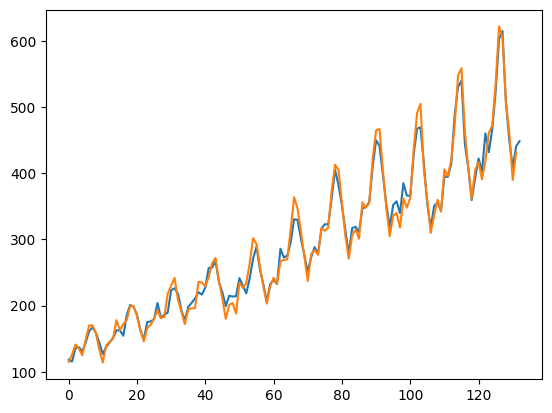

In [26]:
approximation_HOLTWINTERS_additive_2()

In [27]:
def forecast_HOLTWINTERS_additive_2():
    alpha=0.4
    beta=0.03
    gamma=0.75
    
    l=[]
    l.append(1.150e+02)
    
    b=[]
    b.append(1.896e+00)
    
    s=[]
    for i in range(12):
        s.append(passengers['num_passengers'].values[i]-np.mean(passengers['num_passengers'].values[0:12]))
        
    y_aprx=[]
    y_aprx.append(passengers['num_passengers'].values[11])
    
    for i in range(12, len(passengers.index)):
        prev_season=s[i-12]
        last_season=s[i-12+1]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(passengers['num_passengers'].values[i]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(passengers['num_passengers'].values[i]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
        
    for i in range(36):
        prev_season=s[-12]
        last_season=s[-11]
        prev_level=l[-1]
        prev_trend=b[-1]
        
        l.append((alpha*(y_aprx[-1]-prev_season)+(1-alpha)*(l[-1]+b[-1])))
        b.append(beta*(l[-1]-prev_level)+(1-beta)*b[-1])
        season=gamma*(y_aprx[-1]-prev_level-prev_trend)+(1-gamma)*prev_season
        
        s.append(season)
        y_aprx.append(l[-1]+b[-1]+last_season)
    
    plt.plot(y_aprx)
    plt.plot(passengers['num_passengers'][12:].values)

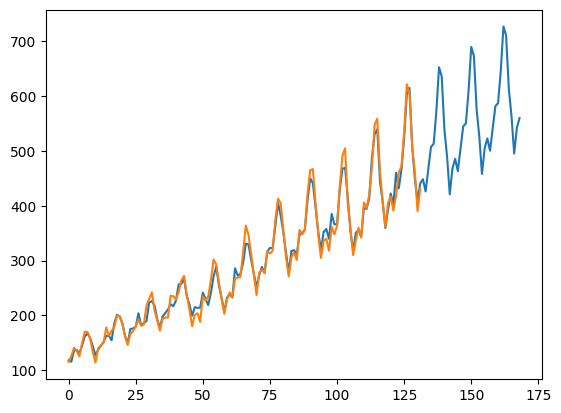

In [28]:
forecast_HOLTWINTERS_additive_2()